In [1]:
!nvidia-smi

Mon Feb 19 13:20:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

100%|██████████| 6.23M/6.23M [00:00<00:00, 216MB/s]

100%|██████████| 104k/104k [00:00<00:00, 36.1MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 113.0ms
Speed: 13.5ms preprocess, 113.0ms inference, 746.9ms postprocess per image at shape (1, 3, 640, 384)


In [6]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [7]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [8]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [9]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow


from roboflow import Roboflow
rf = Roboflow(api_key="pqtDuapTUPqyX1gbfVXS")
project = rf.workspace("ecg-detection").project("ecg-detection-4vlik")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing i

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ECG-Detection-1 in yolov8:: 100%|██████████| 824/824 [00:00<00:00, 2962.98it/s]


## Custom Training

In [10]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 275MB/s]
New https://pypi.org/project/ultralytics/8.1.15 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/ECG-Detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_

In [11]:
!ls {HOME}/runs/detect/train/

args.yaml					   P_curve.png	     train_batch2.jpg
confusion_matrix_normalized.png			   PR_curve.png      train_batch360.jpg
confusion_matrix.png				   R_curve.png	     train_batch361.jpg
events.out.tfevents.1708348909.8c1745b9629a.826.0  results.csv	     train_batch362.jpg
F1_curve.png					   results.png	     val_batch0_labels.jpg
labels_correlogram.jpg				   train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					   train_batch1.jpg  weights


/content


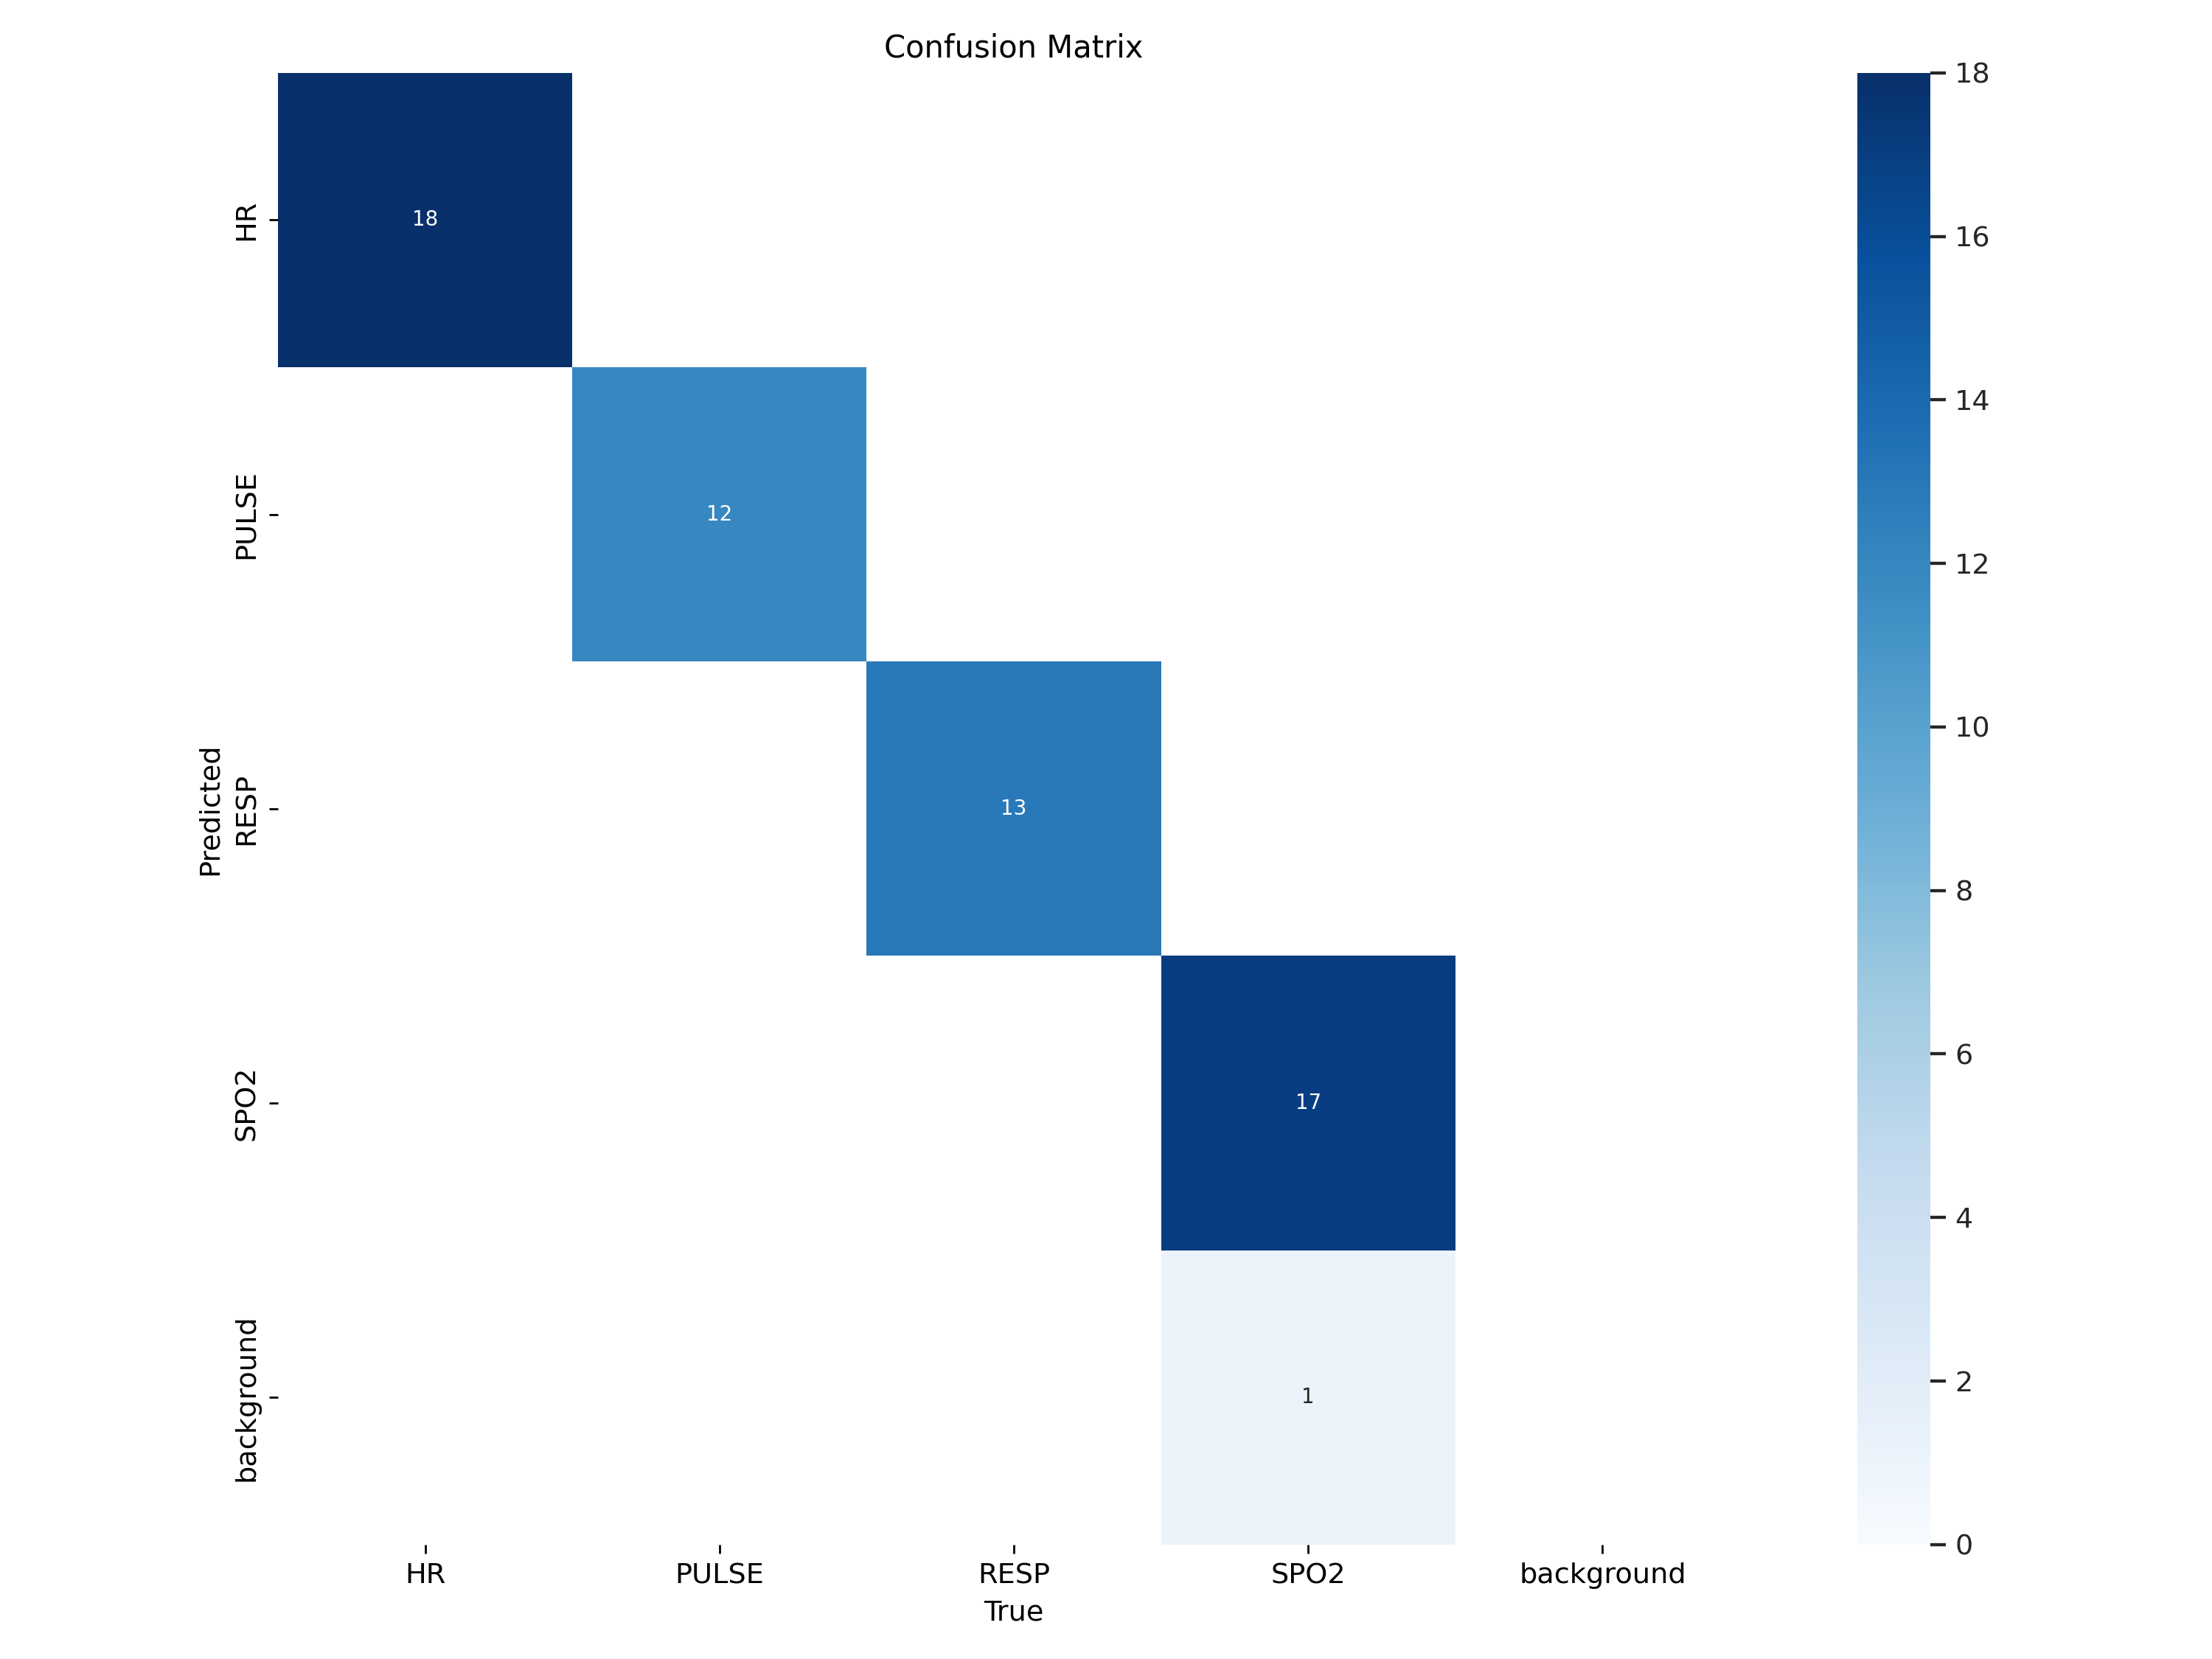

In [12]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

/content


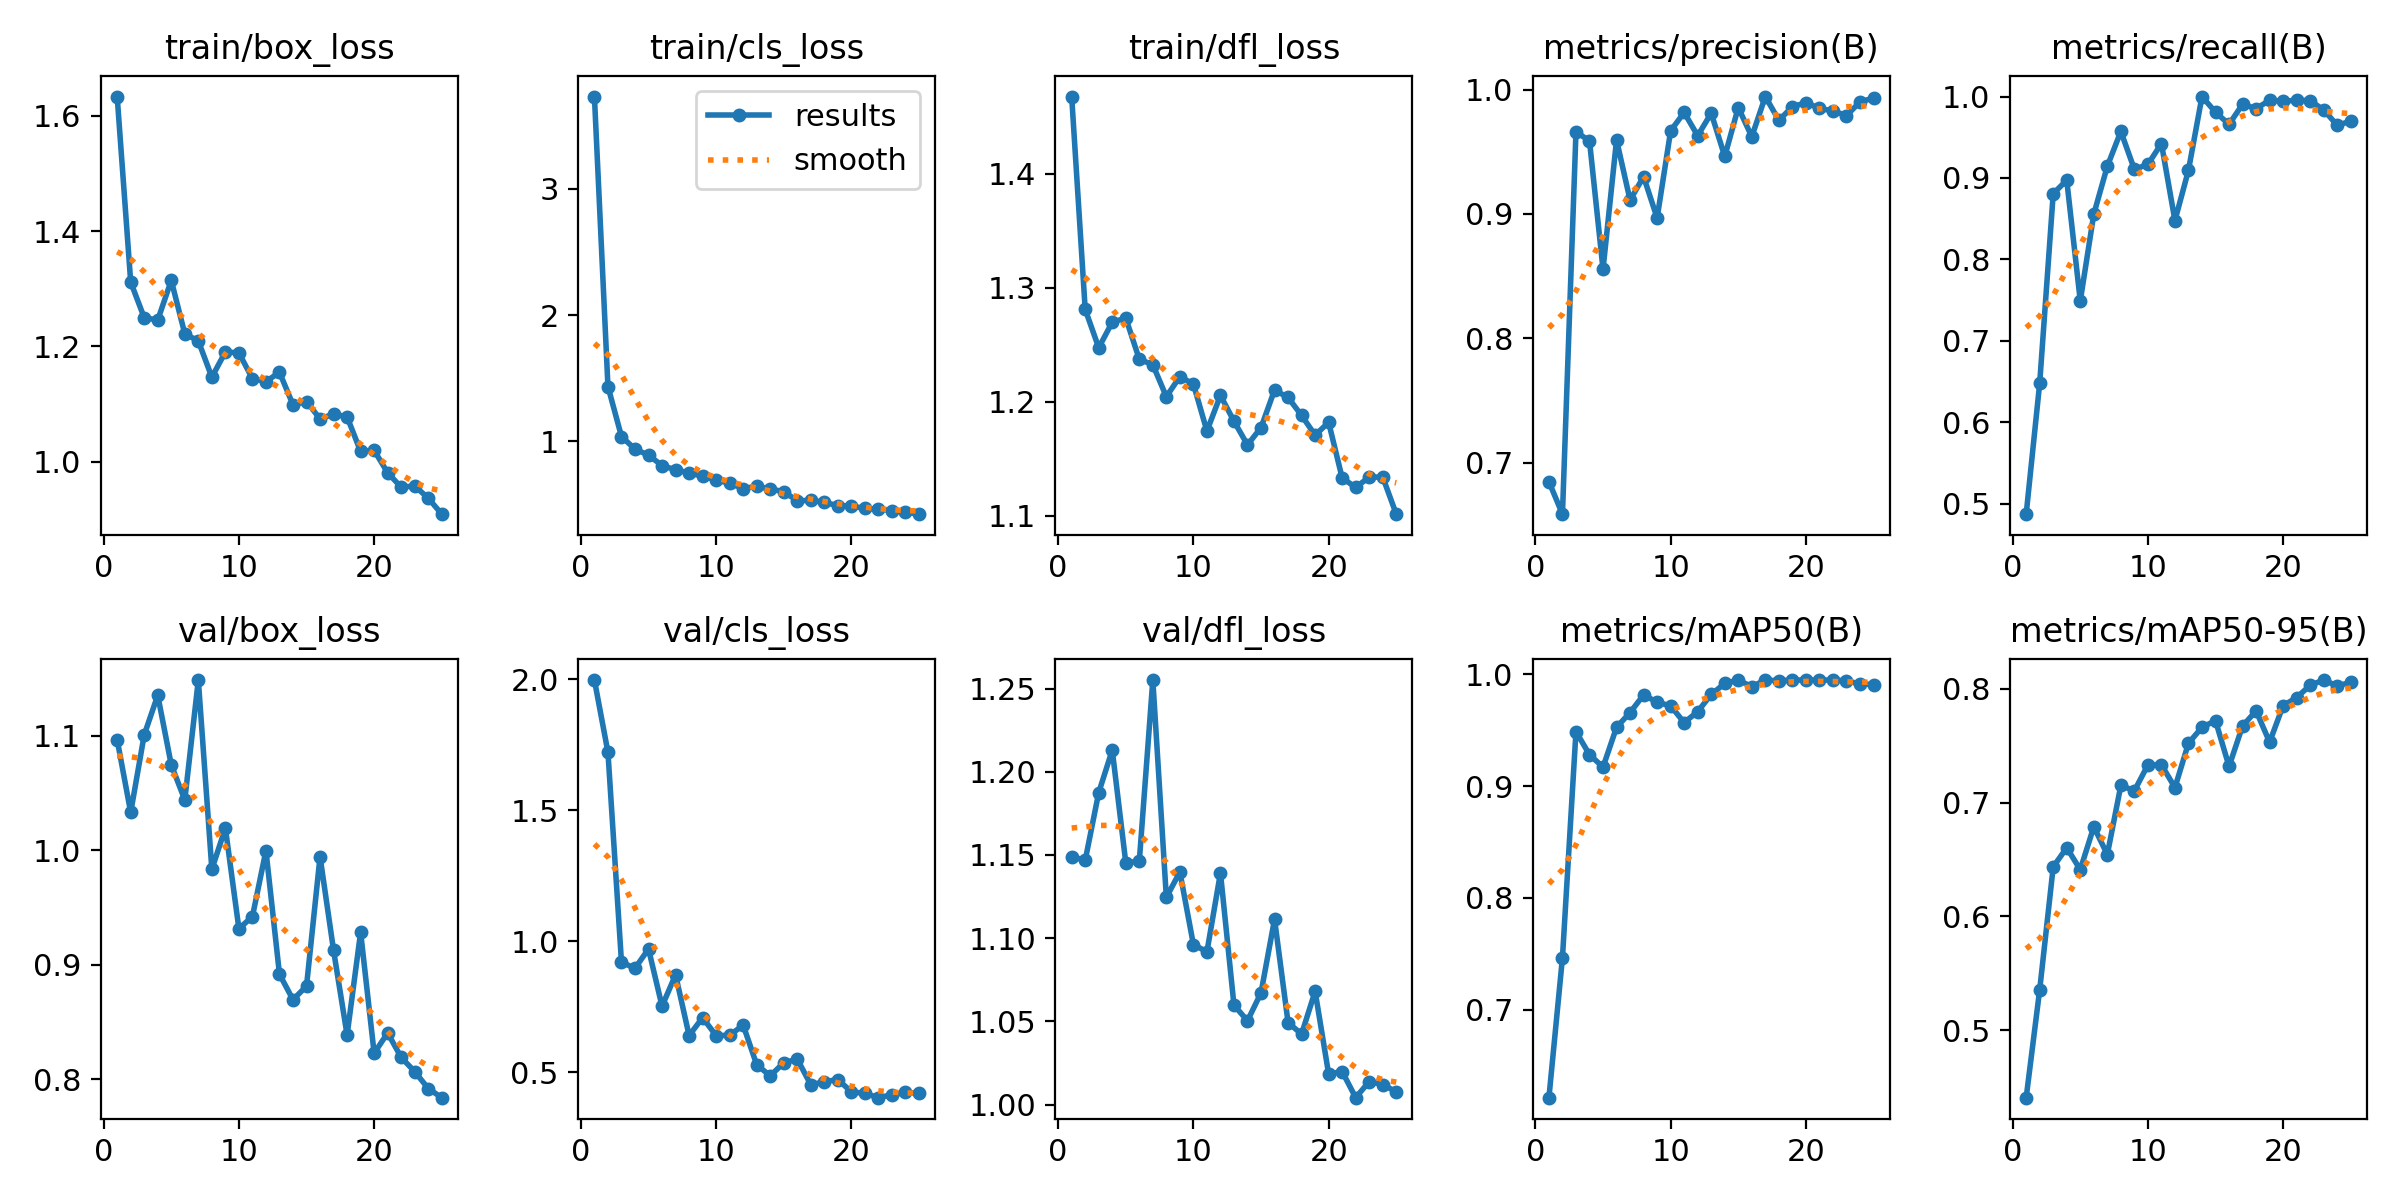

In [13]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/results.png', width=600)

## Validate Custom Model

In [14]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/ECG-Detection-1/valid/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100% 18/18 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.10it/s]
                   all         18         61      0.979      0.983      0.994      0.804
                    HR         18         18      0.974          1      0.995      0.803
                 PULSE         18         12          1      0.989      0.995       0.76
                  RESP         18         13      0.967          1      0.995      0.848
                  SPO2         18         18      0.974      0.944      0.992      0.805
Speed: 8.7ms preprocess, 32.1ms inference, 0.0ms loss, 38.8ms postprocess per image
Results saved to runs/detect/val
💡

## Inference with Custom Model

**NOTE:** Let's take a look at few results.

In [20]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/16 /content/datasets/ECG-Detection-1/test/images/medicakolkata_mau_mon-2_2022_5_18_21_8_51_jpeg.rf.c8f0439152a00fc190f8f0052265847f.jpg: 800x800 1 HR, 1 PULSE, 1 RESP, 1 SPO2, 25.1ms
image 2/16 /content/datasets/ECG-Detection-1/test/images/medicakolkata_mau_mon-2_2022_5_30_0_8_8_jpeg.rf.34a0ab69207ddf86c490c951c971d36b.jpg: 800x800 1 HR, 1 PULSE, 1 RESP, 1 SPO2, 22.6ms
image 3/16 /content/datasets/ECG-Detection-1/test/images/medicakolkata_mau_mon-2_2022_5_30_2_8_2_jpeg.rf.5976c25095c95e297f108fd9ba5fc12d.jpg: 800x800 1 HR, 1 PULSE, 1 RESP, 1 SPO2, 22.4ms
image 4/16 /content/datasets/ECG-Detection-1/test/images/medicakolkata_mau_mon-2_2022_5_30_3_8_16_jpeg.rf.ef156d402879062c63e0cea8d45a3ad4.jpg: 800x800 1 HR, 1 PULSE, 1 RESP, 1 SPO2, 22.4ms
image 5/16 /content/datasets/ECG-Detection-1/test/images/medic

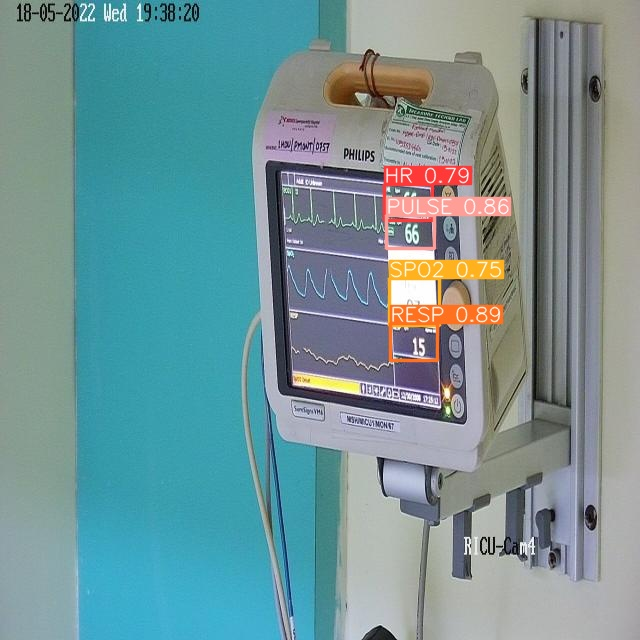

In [21]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/medicakolkata_rcu_mon-9_2022_5_18_22_5_51_jpeg.rf.237941304ed4a87778f1fadec4b2b45d.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [17]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on medicakolkata_mau_mon-8_2022_5_18_4_6_54_jpeg.rf.5e1394f82e78c82d131c273e43db2692.jpg


{'predictions': [{'x': 397.0,
   'y': 318.5,
   'width': 46.0,
   'height': 55.0,
   'confidence': 0.9110386371612549,
   'class': 'SPO2',
   'class_id': 3,
   'detection_id': '85ba27d6-66dc-46c4-aaf5-4894f85a8e77',
   'image_path': '/content/datasets/ECG-Detection-1/test/images/medicakolkata_mau_mon-8_2022_5_18_4_6_54_jpeg.rf.5e1394f82e78c82d131c273e43db2692.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 441.5,
   'y': 248.5,
   'width': 39.0,
   'height': 33.0,
   'confidence': 0.9101038575172424,
   'class': 'PULSE',
   'class_id': 1,
   'detection_id': '7943889d-4939-48d6-abda-040a15d08a7b',
   'image_path': '/content/datasets/ECG-Detection-1/test/images/medicakolkata_mau_mon-8_2022_5_18_4_6_54_jpeg.rf.5e1394f82e78c82d131c273e43db2692.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 395.0,
   'y': 260.0,
   'width': 42.0,
   'height': 52.0,
   'confidence': 0.8862335681915283,
   'class': 'HR',
   'class_id': 0,
   'detection_id': 'ae831e49-f717-4f49-9a03-

In [22]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/testvideo.mp4 save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/900) /content/testvideo.mp4: 480x800 1 HR, 172.8ms
video 1/1 (2/900) /content/testvideo.mp4: 480x800 1 HR, 15.4ms
video 1/1 (3/900) /content/testvideo.mp4: 480x800 1 HR, 15.3ms
video 1/1 (4/900) /content/testvideo.mp4: 480x800 1 HR, 15.4ms
video 1/1 (5/900) /content/testvideo.mp4: 480x800 1 HR, 15.3ms
video 1/1 (6/900) /content/testvideo.mp4: 480x800 1 HR, 15.4ms
video 1/1 (7/900) /content/testvideo.mp4: 480x800 1 HR, 15.3ms
video 1/1 (8/900) /content/testvideo.mp4: 480x800 1 HR, 15.3ms
video 1/1 (9/900) /content/testvideo.mp4: 480x800 1 HR, 15.3ms
video 1/1 (10/900) /content/testvideo.mp4: 480x800 1 HR, 15.4ms
video 1/1 (11/900) /content/testvideo.mp4: 480x800 1 HR, 15.3ms
video 1/1 (12/900) /content/testvideo.mp4: 480x800 1 HR, 15.3ms
video 1/1 (13/900) /content/